In [1]:
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.ar_model import AR, ARResults
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Non Satitoanry
usp_df=pd.read_csv('../Data/uspopulation.csv',index_col='DATE', parse_dates=True)
usp_df.index.freq='MS'
print(usp_df.shape)
usp_df.head()

(96, 1)


,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


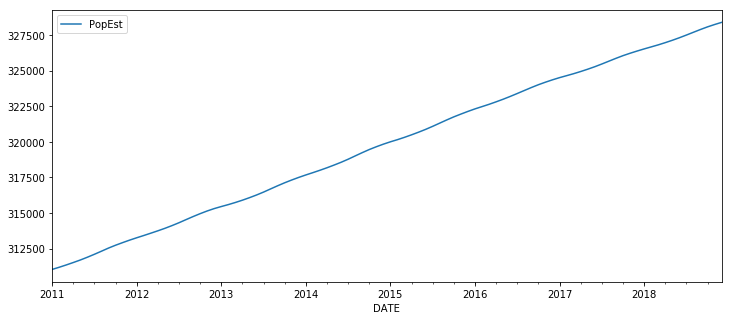

In [3]:
usp_df.plot(figsize=(12,5))

In [4]:
train=usp_df.iloc[:84]
test=usp_df.iloc[84:]

In [5]:
train.tail()

,PopEst
DATE,
2017-08-01,325667
2017-09-01,325866
2017-10-01,326054
2017-11-01,326222
2017-12-01,326378


In [6]:
test.head()

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134


In [7]:
model=AR(train['PopEst'])
arfit=model.fit(maxlag=1)

In [8]:
arfit.k_ar

1

In [9]:
arfit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [10]:
start_ = len(train)
end_ = start_ + len(test) - 1 

In [11]:
print(start_,end_)

84 95


In [12]:
pred_1=arfit.predict(start=start_,end=end_)
pred_1=pred_1.rename('AR(1)_MODEL_PREDICTION')

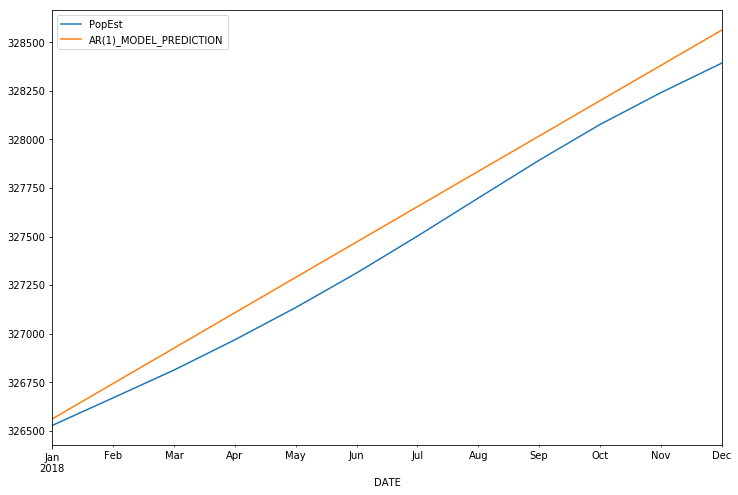

In [13]:
test.plot(figsize=(12,8), legend=True)
pred_1.plot(legend=True);

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64


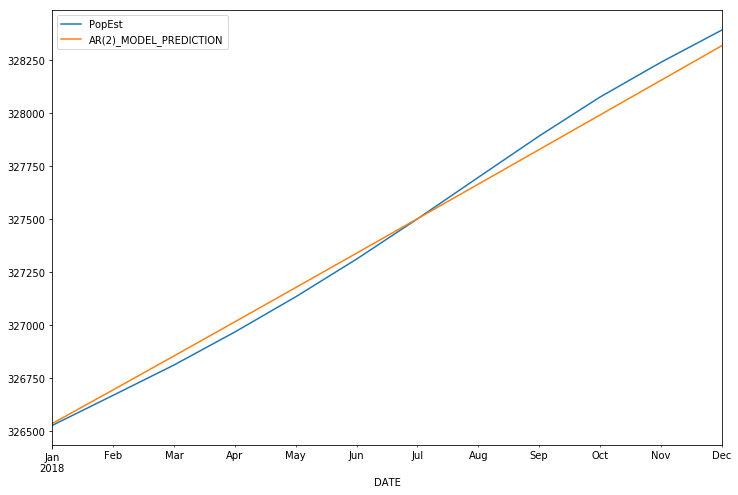

In [14]:
arfit2=model.fit(maxlag=2)
print(arfit2.params)
pred_2=arfit2.predict(start=start_,end=end_)
pred_2=pred_2.rename('AR(2)_MODEL_PREDICTION')
test.plot(figsize=(12,8), legend=True)
pred_2.plot(legend=True);

In [15]:
arfit_find_best=model.fit(ic='t-stat')
print(arfit_find_best.params)

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


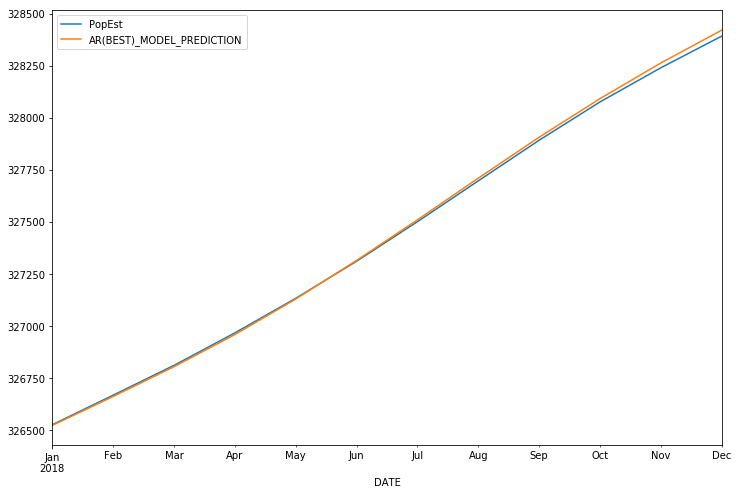

In [16]:
pred_best=arfit_find_best.predict(start=start_,end=end_)
pred_best=pred_best.rename('AR(BEST)_MODEL_PREDICTION')
test.plot(figsize=(12,8), legend=True)
pred_best.plot(legend=True);

In [17]:
labels=['AR1', 'AR2', 'AR8']
pred=[pred_1,pred_2,pred_best]

In [18]:
for i in range(len(labels)):
    error = mean_squared_error(test['PopEst'],pred[i])
    #np.sqrt()
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714238785422
AR2 MSE was : 2713.258528140898
AR8 MSE was : 186.97397472611956


In [19]:
for i in range(len(labels)):
    error = mean_squared_error(test['PopEst'],pred[i])
    error = np.sqrt(error)
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 132.09736650965235
AR2 MSE was : 52.08894823415902
AR8 MSE was : 13.673842719810681


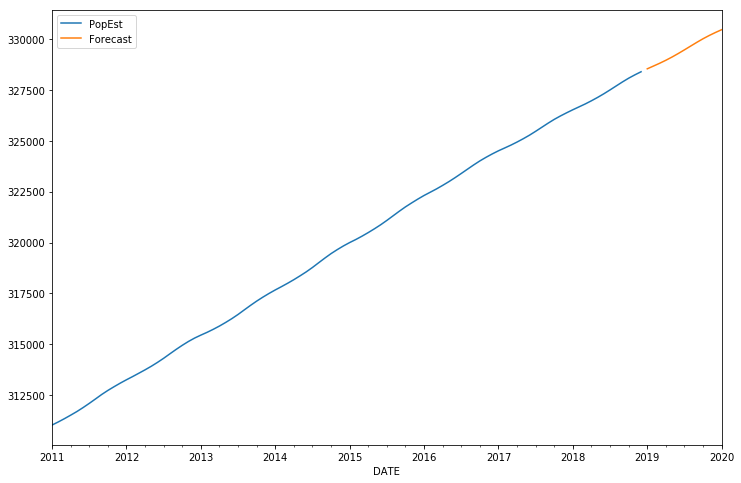

In [20]:
model = AR(usp_df['PopEst'])
ARfit = model.fit()
forecast_values = ARfit.predict(start = len(usp_df), end = len(usp_df)+12)
forecast_values = forecast_values.rename('Forecast')
usp_df.plot(figsize=(12,8), legend=True)
forecast_values.plot(legend=True);